####  Problem Set 3


Occupations<br>
Step 1. Import the necessary libraries<br>
Step 2. Import the dataset from this address<br>
Step 3. Assign it to a variable called users<br>
Step 4. Discover what is the mean age per occupation<br>
Step 5. Discover the Male ratio per occupation and sort it from the most to the least <br>
Step 6. For each occupation, calculate the minimum and maximum ages
Step 7. For each combination of occupation and sex, calculate the mean age 
Step 8. For each occupation present the percentage of women and men

In [1]:
# Step 1: Import the necessary libraries
import pandas as pd

# Step 2: Import the dataset
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"

# Step 3: Assign the dataset to a variable called 'users'
users = pd.read_csv(url, sep='|', index_col='user_id')

In [2]:
# Step 4: Discover the mean age per occupation
mean_age_per_occupation = users.groupby('occupation')['age'].mean()

# Displays the mean age per Occupation in a tabular format
print("Mean Age per Occupation:")
print(mean_age_per_occupation.to_markdown())  
print("\n")

Mean Age per Occupation:
| occupation    |     age |
|:--------------|--------:|
| administrator | 38.7468 |
| artist        | 31.3929 |
| doctor        | 43.5714 |
| educator      | 42.0105 |
| engineer      | 36.3881 |
| entertainment | 29.2222 |
| executive     | 38.7188 |
| healthcare    | 41.5625 |
| homemaker     | 32.5714 |
| lawyer        | 36.75   |
| librarian     | 40      |
| marketing     | 37.6154 |
| none          | 26.5556 |
| other         | 34.5238 |
| programmer    | 33.1212 |
| retired       | 63.0714 |
| salesman      | 35.6667 |
| scientist     | 35.5484 |
| student       | 22.0816 |
| technician    | 33.1481 |
| writer        | 36.3111 |




In [3]:
# Step 5: Discover the Male ratio per occupation
def male_ratio(group):
    return (group == 'M').sum() / group.count()

male_ratio_per_occupation = users.groupby('occupation')['gender'].apply(male_ratio)
male_ratio_in_order = male_ratio_per_occupation.sort_values(ascending=False)

# Displays the male ratio per occupation in tabular format
print("Male Ratio per Occupation:")
print(male_ratio_in_order.to_markdown())  
print("\n")

Male Ratio per Occupation:
| occupation    |   gender |
|:--------------|---------:|
| doctor        | 1        |
| engineer      | 0.970149 |
| technician    | 0.962963 |
| retired       | 0.928571 |
| programmer    | 0.909091 |
| executive     | 0.90625  |
| scientist     | 0.903226 |
| entertainment | 0.888889 |
| lawyer        | 0.833333 |
| salesman      | 0.75     |
| educator      | 0.726316 |
| student       | 0.693878 |
| other         | 0.657143 |
| marketing     | 0.615385 |
| writer        | 0.577778 |
| none          | 0.555556 |
| administrator | 0.544304 |
| artist        | 0.535714 |
| librarian     | 0.431373 |
| healthcare    | 0.3125   |
| homemaker     | 0.142857 |




In [4]:
# Step 6: Calculate the minimum and maximum ages per occupation
age_range_per_occupation = users.groupby('occupation')['age'].agg(['min', 'max'])

# Displays the age range per occupation data in tabular format
print("Age Range per Occupation:")
print(age_range_per_occupation.to_markdown())  
print("\n")

Age Range per Occupation:
| occupation    |   min |   max |
|:--------------|------:|------:|
| administrator |    21 |    70 |
| artist        |    19 |    48 |
| doctor        |    28 |    64 |
| educator      |    23 |    63 |
| engineer      |    22 |    70 |
| entertainment |    15 |    50 |
| executive     |    22 |    69 |
| healthcare    |    22 |    62 |
| homemaker     |    20 |    50 |
| lawyer        |    21 |    53 |
| librarian     |    23 |    69 |
| marketing     |    24 |    55 |
| none          |    11 |    55 |
| other         |    13 |    64 |
| programmer    |    20 |    63 |
| retired       |    51 |    73 |
| salesman      |    18 |    66 |
| scientist     |    23 |    55 |
| student       |     7 |    42 |
| technician    |    21 |    55 |
| writer        |    18 |    60 |




In [5]:
# Step 7: Calculate the mean age per combination of occupation and sex
mean_age_per_combination = users.groupby(['occupation', 'gender'])['age'].mean()

# Displays the mean age per occupation and gender in tabular format
print("Mean Age per Occupation and Gender:")
print(mean_age_per_combination.to_markdown())  
print("\n")

Mean Age per Occupation and Gender:
|                        |     age |
|:-----------------------|--------:|
| ('administrator', 'F') | 40.6389 |
| ('administrator', 'M') | 37.1628 |
| ('artist', 'F')        | 30.3077 |
| ('artist', 'M')        | 32.3333 |
| ('doctor', 'M')        | 43.5714 |
| ('educator', 'F')      | 39.1154 |
| ('educator', 'M')      | 43.1014 |
| ('engineer', 'F')      | 29.5    |
| ('engineer', 'M')      | 36.6    |
| ('entertainment', 'F') | 31      |
| ('entertainment', 'M') | 29      |
| ('executive', 'F')     | 44      |
| ('executive', 'M')     | 38.1724 |
| ('healthcare', 'F')    | 39.8182 |
| ('healthcare', 'M')    | 45.4    |
| ('homemaker', 'F')     | 34.1667 |
| ('homemaker', 'M')     | 23      |
| ('lawyer', 'F')        | 39.5    |
| ('lawyer', 'M')        | 36.2    |
| ('librarian', 'F')     | 40      |
| ('librarian', 'M')     | 40      |
| ('marketing', 'F')     | 37.2    |
| ('marketing', 'M')     | 37.875  |
| ('none', 'F')          | 36.5    |
| 

In [6]:
# Step 8: Calculate the percentage of women and men per occupation
def gender_percentage(group):
    total_count = group.count()
    
    female_count = (group == 'F').sum()
    female_percentage = (female_count / total_count) * 100
    
    male_count = total_count - female_count
    male_percentage = (male_count / total_count) * 100
    
    return pd.Series({'Female %': female_percentage, 'Male %': male_percentage})

gender_percentage_per_occupation = users.groupby('occupation')['gender'].apply(gender_percentage)
gender_percentage_per_occupation = gender_percentage_per_occupation.reset_index()

# Displays the gender percentage per occupation in tabular format
print("Gender Percentage per Occupation:")
print(gender_percentage_per_occupation.to_markdown(index=False))  

Gender Percentage per Occupation:
| occupation    | level_1   |    gender |
|:--------------|:----------|----------:|
| administrator | Female %  |  45.5696  |
| administrator | Male %    |  54.4304  |
| artist        | Female %  |  46.4286  |
| artist        | Male %    |  53.5714  |
| doctor        | Female %  |   0       |
| doctor        | Male %    | 100       |
| educator      | Female %  |  27.3684  |
| educator      | Male %    |  72.6316  |
| engineer      | Female %  |   2.98507 |
| engineer      | Male %    |  97.0149  |
| entertainment | Female %  |  11.1111  |
| entertainment | Male %    |  88.8889  |
| executive     | Female %  |   9.375   |
| executive     | Male %    |  90.625   |
| healthcare    | Female %  |  68.75    |
| healthcare    | Male %    |  31.25    |
| homemaker     | Female %  |  85.7143  |
| homemaker     | Male %    |  14.2857  |
| lawyer        | Female %  |  16.6667  |
| lawyer        | Male %    |  83.3333  |
| librarian     | Female %  |  56.8627  |


<h2>Question 2</h2>
Euro Teams<br>
Step 1. Import the necessary libraries<br>
Step 2. Import the dataset from this address<br>
Step 3. Assign it to a variable called euro12 <br>
Step 4. Select only the Goal column<br>
Step 5. How many team participated in the Euro2012? <br>
Step 6. What is the number of columns in the dataset?<br>
Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline<br>
Step 8. Sort the teams by Red Cards, then to Yellow Cards <br>
Step 9. Calculate the mean Yellow Cards given per Team<br>
Step 10. Filter teams that scored more than 6 goalsStep 11. Select the teams that start with G<br>
Step 12. Select the first 7 columns<br>
Step 13. Select all columns except the last 3<br>
Step 14. Present only the Shooting Accuracy from England, Italy and Russia<br>

In [7]:
# Step 1: Import the necessary libraries
import pandas as pd

# Step 2: Impotr the dataset
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"

# Step 3: Assign the dataset to a variable named 'euro12'
euro12 = pd.read_csv(url)

In [8]:
# Step 4: Select only the 'Goals' column
goals = euro12['Goals']

# Displays the 'Goals' column in tabular format
print(" Goals ")
print(goals.to_markdown())
print("\n")

 Goals 
|    |   Goals |
|---:|--------:|
|  0 |       4 |
|  1 |       4 |
|  2 |       4 |
|  3 |       5 |
|  4 |       3 |
|  5 |      10 |
|  6 |       5 |
|  7 |       6 |
|  8 |       2 |
|  9 |       2 |
| 10 |       6 |
| 11 |       1 |
| 12 |       5 |
| 13 |      12 |
| 14 |       5 |
| 15 |       2 |




In [9]:
# Step 5: How many teams participated in Euro2012?
participating_teams = euro12['Team'].nunique()

# Displays the total number of participating teams
print("Total number of participating teams in Euro 2012: ", participating_teams)
print("\n")

Total number of participating teams in Euro 2012:  16




In [10]:
# Step 6: Number of columns in the dataset
num_columns = euro12.shape[1]

# Displays the total number of columns
print("Total number of columns in the dataset: ", num_columns)
print("\n")

Total number of columns in the dataset:  35




In [11]:
# Step 7: View only the columns Team, Yellow Cards and Red Cards
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]

# Displays the team discipline performance in tabular format
print("Team Discipline Performance:")
print(discipline.to_markdown())
print("\n")

Team Discipline Performance:
|    | Team                |   Yellow Cards |   Red Cards |
|---:|:--------------------|---------------:|------------:|
|  0 | Croatia             |              9 |           0 |
|  1 | Czech Republic      |              7 |           0 |
|  2 | Denmark             |              4 |           0 |
|  3 | England             |              5 |           0 |
|  4 | France              |              6 |           0 |
|  5 | Germany             |              4 |           0 |
|  6 | Greece              |              9 |           1 |
|  7 | Italy               |             16 |           0 |
|  8 | Netherlands         |              5 |           0 |
|  9 | Poland              |              7 |           1 |
| 10 | Portugal            |             12 |           0 |
| 11 | Republic of Ireland |              6 |           1 |
| 12 | Russia              |              6 |           0 |
| 13 | Spain               |             11 |           0 |
| 14 | Swed

In [12]:
# Step 8: Sort the teams by Red Cards, then Yellow Cards
sorted_discipline = discipline.sort_values(by=['Red Cards', 'Yellow Cards'])

# Displays the sorted team discipline performance in tabular format
print("Team Discipline Performance (Sorted):")
print(sorted_discipline.to_markdown())
print("\n")

Team Discipline Performance (Sorted):
|    | Team                |   Yellow Cards |   Red Cards |
|---:|:--------------------|---------------:|------------:|
|  2 | Denmark             |              4 |           0 |
|  5 | Germany             |              4 |           0 |
|  3 | England             |              5 |           0 |
|  8 | Netherlands         |              5 |           0 |
| 15 | Ukraine             |              5 |           0 |
|  4 | France              |              6 |           0 |
| 12 | Russia              |              6 |           0 |
|  1 | Czech Republic      |              7 |           0 |
| 14 | Sweden              |              7 |           0 |
|  0 | Croatia             |              9 |           0 |
| 13 | Spain               |             11 |           0 |
| 10 | Portugal            |             12 |           0 |
|  7 | Italy               |             16 |           0 |
| 11 | Republic of Ireland |              6 |           1 |
| 

In [13]:
# Step 9: Calculate the mean Yellow Cards given per Team
mean_yellow_cards_per_team = euro12.groupby('Team')['Yellow Cards'].mean().reset_index()

# Displays the mean Yellow Cards per Team in tabular format
print("Mean Yellow Cards per Team: ")
print(mean_yellow_cards_per_team.to_markdown(index=False))
print("\n")

Mean Yellow Cards per Team: 
| Team                |   Yellow Cards |
|:--------------------|---------------:|
| Croatia             |              9 |
| Czech Republic      |              7 |
| Denmark             |              4 |
| England             |              5 |
| France              |              6 |
| Germany             |              4 |
| Greece              |              9 |
| Italy               |             16 |
| Netherlands         |              5 |
| Poland              |              7 |
| Portugal            |             12 |
| Republic of Ireland |              6 |
| Russia              |              6 |
| Spain               |             11 |
| Sweden              |              7 |
| Ukraine             |              5 |




In [14]:
# Step 10: Filter teams that scored more than 6 goals
high_scoring_teams = euro12[euro12['Goals'] > 6][['Team', 'Goals']]

# Displays teams that scored more than 6 goals in tabular format
print("Teams that scored more than 6 goals:")
print(high_scoring_teams.to_markdown(index=False))
print("\n")

Teams that scored more than 6 goals:
| Team    |   Goals |
|:--------|--------:|
| Germany |      10 |
| Spain   |      12 |




In [15]:
# Step 11: Select teams that start with G
teams_starting_with_G = euro12[euro12['Team'].str.startswith('G')]['Team']

# Displays teams starting with the letter G in tabular format
print("Teams starting with letter G:")
print(teams_starting_with_G.to_markdown(index=False))
print("\n")

Teams starting with letter G:
| Team    |
|:--------|
| Germany |
| Greece  |




In [16]:
# Step 12: Select the first 7 columns
first_7_columns = euro12.iloc[:, :7]

# Displays the first 7 columns in tabular format
print("First seven columns:")
print(first_7_columns.to_markdown())
print("\n")

First seven columns:
|    | Team                |   Goals |   Shots on target |   Shots off target | Shooting Accuracy   | % Goals-to-shots   |   Total shots (inc. Blocked) |
|---:|:--------------------|--------:|------------------:|-------------------:|:--------------------|:-------------------|-----------------------------:|
|  0 | Croatia             |       4 |                13 |                 12 | 51.9%               | 16.0%              |                           32 |
|  1 | Czech Republic      |       4 |                13 |                 18 | 41.9%               | 12.9%              |                           39 |
|  2 | Denmark             |       4 |                10 |                 10 | 50.0%               | 20.0%              |                           27 |
|  3 | England             |       5 |                11 |                 18 | 50.0%               | 17.2%              |                           40 |
|  4 | France              |       3 |                2

In [17]:
# Step 13: Select all columns except the last 3
all_columns_except_last_3 = euro12.iloc[:, :-3]

# Displays all columns except the last 3 in tabular format
print("All columns except the last three: ")
print(all_columns_except_last_3)
print("\n")

All columns except the last three: 
                   Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31  

In [18]:
# Step 14: Present only the Shooting Accuracy from England, Italy, and Russia
selected_teams = ['England', 'Italy', 'Russia']
shooting_accuracy_selected_teams = euro12[euro12['Team'].isin(selected_teams)][['Team', 'Shooting Accuracy']]

# Displays shooting accuracy for selected teams in tabular format
print("Shooting Accuracy for England, Italy, and Russia:")
print(shooting_accuracy_selected_teams.to_markdown())
print("\n")

Shooting Accuracy for England, Italy, and Russia:
|    | Team    | Shooting Accuracy   |
|---:|:--------|:--------------------|
|  3 | England | 50.0%               |
|  7 | Italy   | 43.0%               |
| 12 | Russia  | 22.5%               |




<h2>Question 3</h2>
Housing<br>
Step 1. Import the necessary libraries<br>
Step 2. Create 3 differents Series, each of length 100, as follows:<br>
<ul>
<li>The first a random number from 1 to 4</li>
<li>The second a random number from 1 to 3</li>
<li>The third a random number from 10,000 to 30,000 </li></ul>
Step 3. Create a DataFrame by joinning the Series by column<br>
Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter<br>
Step 5. Create a one column DataFrame with the values of the 3 Series and assign it 
to 'bigcolumn'<br>
Step 6. Ops it seems it is going only until index 99. Is it true? <br>
Step 7. Reindex the DataFrame so it goes from 0 to 299<br>

In [19]:
# Step 1: Import the necessary libraries
import pandas as pd
import numpy as np
from tabulate import tabulate

# Step 2: Create 3 different Series
# Generates Random integers between 1 and 4
series1 = pd.Series(np.random.randint(1, 5, size=100))  
# Generates Random integers between 1 and 3
series2 = pd.Series(np.random.randint(1, 4, size=100))  
# Generates Random integers between 10000 and 30000
series3 = pd.Series(np.random.randint(10000, 30001, size=100))  

# Step 3: Create a DataFrame by joining the Series by column
data = pd.concat([series1, series2, series3], axis=1)

# Step 4: Change the name of the columns
data.columns = ['bedrs', 'bathrs', 'price_sqr_meter']

# Step 5: Create a one column DataFrame with the values of the 3 Series
bigcolumn = pd.concat([series1, series2, series3], ignore_index=True)

In [20]:
# Step 6: Check if the DataFrame goes only until index 99
print("Does the DataFrame go only until index 99?", bigcolumn.index.max() == 99)
print("\n")

Does the DataFrame go only until index 99? False




In [21]:
# Step 7: Reindex the DataFrame so it goes from 0 to 299
bigcolumn = bigcolumn.reindex(range(300))

# Prints the DataFrames using tabulate
print("Data DataFrame:")
print(tabulate(data, headers='keys', tablefmt='grid'))
print("\n")

Data DataFrame:
+----+---------+----------+-------------------+
|    |   bedrs |   bathrs |   price_sqr_meter |
+====+=========+==========+===================+
|  0 |       4 |        2 |             29873 |
+----+---------+----------+-------------------+
|  1 |       1 |        1 |             14811 |
+----+---------+----------+-------------------+
|  2 |       2 |        3 |             23604 |
+----+---------+----------+-------------------+
|  3 |       2 |        2 |             17145 |
+----+---------+----------+-------------------+
|  4 |       3 |        1 |             17690 |
+----+---------+----------+-------------------+
|  5 |       4 |        1 |             28058 |
+----+---------+----------+-------------------+
|  6 |       1 |        3 |             14547 |
+----+---------+----------+-------------------+
|  7 |       1 |        1 |             20291 |
+----+---------+----------+-------------------+
|  8 |       1 |        1 |             25060 |
+----+---------+--------

In [22]:
print("Bigcolumn DataFrame:")
print(tabulate(bigcolumn.to_frame(), headers='keys', tablefmt='grid'))

Bigcolumn DataFrame:
+-----+-------+
|     |     0 |
+=====+=======+
|   0 |     4 |
+-----+-------+
|   1 |     1 |
+-----+-------+
|   2 |     2 |
+-----+-------+
|   3 |     2 |
+-----+-------+
|   4 |     3 |
+-----+-------+
|   5 |     4 |
+-----+-------+
|   6 |     1 |
+-----+-------+
|   7 |     1 |
+-----+-------+
|   8 |     1 |
+-----+-------+
|   9 |     4 |
+-----+-------+
|  10 |     4 |
+-----+-------+
|  11 |     1 |
+-----+-------+
|  12 |     2 |
+-----+-------+
|  13 |     2 |
+-----+-------+
|  14 |     1 |
+-----+-------+
|  15 |     2 |
+-----+-------+
|  16 |     1 |
+-----+-------+
|  17 |     2 |
+-----+-------+
|  18 |     4 |
+-----+-------+
|  19 |     1 |
+-----+-------+
|  20 |     2 |
+-----+-------+
|  21 |     2 |
+-----+-------+
|  22 |     2 |
+-----+-------+
|  23 |     1 |
+-----+-------+
|  24 |     4 |
+-----+-------+
|  25 |     3 |
+-----+-------+
|  26 |     1 |
+-----+-------+
|  27 |     4 |
+-----+-------+
|  28 |     2 |
+-----+-------+
|  

<h2>Question 4</h2>
Wind Statistics<br>
The data have been modified to contain some missing values, identified by NaN. 
Using pandas should make this exercise easier, in particular for the bonus question.<br>
You should be able to perform all of these operations without using a for loop or 
other looping construct.<br>
The data in 'wind.data' has the following format:<br>
Yr Mo Dy RPT VAL ROS KIL SHA BIR DUB CLA MUL CLO BEL 
MAL<br>
61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 13.67 10.25 10.83 12.58 18.50 15.04<br>
61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 11.50 10.04 9.79 9.67 17.54 13.83<br>
61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 11.25 NaN 8.50 7.67 12.75 12.71<br>

The first three columns are year, month, and day. The remaining 12 columns are 
average windspeeds in knots at 12 locations in Ireland on that day.<br>
Step 1. Import the necessary libraries<br>
Step 2. Import the dataset from the attached file wind.txt<br>
Step 3. Assign it to a variable called data and replace the first 3 columns by a proper 
datetime index.<br>
Step 4. Year 2061? Do we really have data from this year? Create a function to fix it 
and apply it.<br>
Step 5. Set the right dates as the index. Pay attention at the data type, it should be 
datetime64[ns].<br>
Step 6. Compute how many values are missing for each location over the entire 
record.They should be ignored in all calculations below.<br>
Step 7. Compute how many non-missing values there are in total.<br>
Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and 
all the times.<br>
A single number for the entire dataset.<br>
Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean 
windspeeds and standard deviations of the windspeeds at each location over all the 
days
A different set of numbers for each location.
<br>Step 10. Create a DataFrame called day_stats and calculate the min, max and mean 
windspeed and standard deviations of the windspeeds across all the locations at each 
day.
A different set of numbers for each day.<br>
Step 11. Find the average windspeed in January for each location. 
Treat January 1961 and January 1962 both as January.<br>
Step 12. Downsample the record to a yearly frequency for each location. <br>
Step 13. Downsample the record to a monthly frequency for each location. <br>
Step 14. Downsample the record to a weekly frequency for each location.<br>
Step 15. Calculate the min, max and mean windspeeds and standard deviations of the 
windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.


In [23]:
# Import necessary libraries
import pandas as pd

# Step 1: Read the dataset
data = pd.read_csv("wind.txt", sep=" ")

# Step 2: Define a function to fix year values
def fix_year(year):
    if year >= 90:
        return 1900 + year
    else:
        return 2000 + year

# Step 3: Apply the fix_year function to the 'Yr' column
data['Yr'] = data['Yr'].apply(fix_year)

# Step 4: Rename columns
data = data.rename(columns={'Yr': 'year', 'Mo': 'month', 'Dy': 'day'})

# Step 5: Create a new 'date' column by combining year, month, and day columns
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])

# Step 6: Set the 'date' column as the index
data.set_index('date', inplace=True)

In [24]:
# Step 7: Display the first few rows of the dataset
print("First few rows of the dataset:\n", data.head())


First few rows of the dataset:
       year  month  day  Unnamed: 3  Unnamed: 4    RPT  Unnamed: 6  Unnamed: 7  \
date                                                                            
NaT   2061    NaN  1.0         NaN         1.0  15.04       14.96       13.17   
NaT   2061    NaN  1.0         NaN         2.0  14.71         NaN         NaN   
NaT   2061    NaN  1.0         NaN         3.0  18.50       16.88       12.33   
NaT   2061    NaN  1.0         NaN         4.0  10.58         NaN        6.63   
NaT   2061    NaN  1.0         NaN         5.0  13.33       13.25       11.42   

        VAL  Unnamed: 9  ...  MUL  Unnamed: 30  Unnamed: 31  CLO  Unnamed: 33  \
date                     ...                                                    
NaT     NaN        9.29  ...  NaN          NaN          NaN  NaN          NaN   
NaT     NaN       10.83  ...  NaN          NaN          NaN  NaN          NaN   
NaT   10.13       11.17  ...  NaN          NaN          NaN  NaN          Na

In [25]:
# Step 8: Count missing values for each location
missing_values_per_location = data.isnull().sum()

# Step 9: Display the missing values count
print("Missing Values Count Per Location:")
print(missing_values_per_location)

Missing Values Count Per Location:
year              0
month          4918
day             486
Unnamed: 3     1831
Unnamed: 4     1667
RPT            1625
Unnamed: 6     2256
Unnamed: 7     2478
VAL            2432
Unnamed: 9     2101
Unnamed: 10    2575
ROS            2152
Unnamed: 12    2393
Unnamed: 13    2143
KIL            2331
Unnamed: 15    2221
Unnamed: 16    2985
SHA            3204
Unnamed: 18    3687
Unnamed: 19    3732
BIR            4065
Unnamed: 21    4078
Unnamed: 22    4462
DUB            4416
Unnamed: 24    4817
Unnamed: 25    5032
CLA            5590
Unnamed: 27    5963
Unnamed: 28    6428
MUL            6574
Unnamed: 30    6573
Unnamed: 31    6574
CLO            6574
Unnamed: 33    6574
Unnamed: 34    6574
BEL            6574
Unnamed: 36    6574
Unnamed: 37    6574
MAL            6574
dtype: int64


In [26]:
# Step 10: Count non-missing values in the entire dataset
total_non_missing_values = data.notnull().sum().sum()

# Step 11: Display the total number of non-missing values
print("Total Number of Non-Missing Values:", total_non_missing_values)

Total Number of Non-Missing Values: 98579


In [27]:
# Step 12: Calculate the mean windspeed over all locations and times
mean_windspeed = data.mean().mean()

# Step 13: Display the mean windspeed
print("Mean Windspeed Over All Locations and Times:", mean_windspeed)

Mean Windspeed Over All Locations and Times: 78.53632829425008


In [28]:
# Step 14: Calculate statistics for each location
loc_stats = pd.DataFrame({
    'min': data.min(),
    'max': data.max(),
    'mean': data.mean(),
    'std': data.std()
})

# Step 15: Display the loc_stats DataFrame
print("Statistics for Windspeed at Each Location:")
print(loc_stats)

Statistics for Windspeed at Each Location:
                 min      max         mean       std
year         2061.00  2078.00  2069.500304  5.188131
month          10.00    12.00    11.000000  0.821170
day             1.00    31.00     7.960578  7.025155
Unnamed: 3      1.00    32.96    17.997723  7.320219
Unnamed: 4      1.00    35.38    11.769851  6.146505
RPT             0.67    35.80    12.415559  5.229848
Unnamed: 6      0.21    32.75    11.842916  4.940703
Unnamed: 7      0.42    30.37     9.967187  4.911509
VAL             0.33    37.54    10.106519  4.953028
Unnamed: 9      0.25    32.42    10.079287  4.583270
Unnamed: 10     0.00    30.37     9.848580  5.254887
ROS             0.08    31.08     9.175468  5.175858
Unnamed: 12     0.13    28.21     9.901736  4.674471
Unnamed: 13     0.04    38.96     9.994572  5.011803
KIL             0.00    42.38    10.897985  6.676379
Unnamed: 15     0.00    42.54    10.921328  7.623103
Unnamed: 16     0.00    35.13    10.658755  6.660911
SHA

In [29]:
# Step 16: Calculate statistics for each day
day_stats = data.resample('D').agg({
    'RPT': ['min', 'max', 'mean', 'std'],
    'VAL': ['min', 'max', 'mean', 'std'],
    'ROS': ['min', 'max', 'mean', 'std'],
    'KIL': ['min', 'max', 'mean', 'std'],
    'SHA': ['min', 'max', 'mean', 'std'],
    'BIR': ['min', 'max', 'mean', 'std'],
    'DUB': ['min', 'max', 'mean', 'std'],
    'CLA': ['min', 'max', 'mean', 'std'],
    'MUL': ['min', 'max', 'mean', 'std'],
    'CLO': ['min', 'max', 'mean', 'std'],
    'BEL': ['min', 'max', 'mean', 'std'],
    'MAL': ['min', 'max', 'mean', 'std']
})

# Step 17: Display the day_stats DataFrame
print("Statistics for Windspeed Across All Locations Each Day:")
print(day_stats)

Statistics for Windspeed Across All Locations Each Day:
              RPT                      VAL                      ROS         \
              min    max   mean std    min    max   mean std    min    max   
date                                                                         
2061-10-10  11.46  11.46  11.46 NaN  13.17  13.17  13.17 NaN  12.38  12.38   
2061-10-11  10.13  10.13  10.13 NaN  13.54  13.54  13.54 NaN  12.71  12.71   
2061-10-12    NaN    NaN    NaN NaN    NaN    NaN    NaN NaN   3.67   3.67   
2061-10-13    NaN    NaN    NaN NaN   6.58   6.58   6.58 NaN   8.67   8.67   
2061-10-14    NaN    NaN    NaN NaN   4.38   4.38   4.38 NaN    NaN    NaN   
...           ...    ...    ...  ..    ...    ...    ...  ..    ...    ...   
2078-12-27  17.62  17.62  17.62 NaN  13.21  13.21  13.21 NaN  15.59  15.59   
2078-12-28   5.46   5.46   5.46 NaN   5.00   5.00   5.00 NaN    NaN    NaN   
2078-12-29  14.42  14.42  14.42 NaN    NaN    NaN    NaN NaN  19.17  19.17   
2078-12-

In [30]:
# Step 18: Downsample to yearly frequency for each location
yearly_data = data.resample('Y').mean()

# Step 19: Display the yearly_data DataFrame
print("Yearly Downsampled Data for Each Location:")
print(yearly_data)

Yearly Downsampled Data for Each Location:
              year  month        day  Unnamed: 3  Unnamed: 4        RPT  \
date                                                                      
2061-12-31  2061.0   11.0  20.338462   16.566000   11.814909  15.841951   
2062-12-31  2062.0   11.0  20.338462   15.949268   10.689818  13.582432   
2063-12-31  2063.0   11.0  20.338462   17.883061   14.188929  14.539057   
2064-12-31  2064.0   11.0  20.338462   16.380714   11.891379  14.196341   
2065-12-31  2065.0   11.0  20.338462   16.221250   13.019643  14.180000   
2066-12-31  2066.0   11.0  20.338462   15.683800   12.656200  12.500652   
2067-12-31  2067.0   11.0  20.338462   16.297209   12.231754  12.910000   
2068-12-31  2068.0   11.0  20.338462   16.102449   13.362083  12.840400   
2069-12-31  2069.0   11.0  20.338462   15.225833   11.346316  14.435758   
2070-12-31  2070.0   11.0  20.338462   15.544783   12.165472  13.799535   
2071-12-31  2071.0   11.0  20.338462   16.390426   12.661

In [31]:
# Step 20: Downsample to monthly frequency for each location
monthly_data = data.resample('M').mean()

# Step 21: Display the monthly_data DataFrame
print("Monthly Downsampled Data for Each Location:")
print(monthly_data)

Monthly Downsampled Data for Each Location:
              year  month   day  Unnamed: 3  Unnamed: 4        RPT  \
date                                                                 
2061-10-31  2061.0   10.0  20.5   17.926250   12.380000  15.567143   
2061-11-30  2061.0   11.0  20.0   14.340909    9.925625  13.765385   
2061-12-31  2061.0   12.0  20.5   16.716667   12.789500  18.045000   
2062-01-31     NaN    NaN   NaN         NaN         NaN        NaN   
2062-02-28     NaN    NaN   NaN         NaN         NaN        NaN   
...            ...    ...   ...         ...         ...        ...   
2078-08-31     NaN    NaN   NaN         NaN         NaN        NaN   
2078-09-30     NaN    NaN   NaN         NaN         NaN        NaN   
2078-10-31  2078.0   10.0  20.5   13.551429    8.213000  10.777778   
2078-11-30  2078.0   11.0  20.0   18.382353   15.230526  14.974375   
2078-12-31  2078.0   12.0  20.5   17.079375   13.951111  14.177647   

            Unnamed: 6  Unnamed: 7        VAL

In [32]:
# Step 22: Downsample to weekly frequency for each location
weekly_data = data.resample('W').mean()

# Step 23: Display the weekly_data DataFrame
print("Weekly Downsampled Data for Each Location:")
print(weekly_data)

Weekly Downsampled Data for Each Location:
              year  month   day  Unnamed: 3  Unnamed: 4        RPT  \
date                                                                 
2061-10-16  2061.0   10.0  13.0   12.312500    9.648333  10.795000   
2061-10-23  2061.0   10.0  20.0   20.212857   16.942000  15.281429   
2061-10-30  2061.0   10.0  27.0   20.615000   11.695714  19.095000   
2061-11-06  2061.0   10.0  31.0   13.620000   10.750000  13.000000   
2061-11-13  2061.0   11.0  11.5   15.303333   10.960000  20.996667   
...            ...    ...   ...         ...         ...        ...   
2078-12-04  2078.0   11.0  29.0   14.900000    9.730000   7.355000   
2078-12-11  2078.0   12.0  10.5   22.585000   20.855000  17.185000   
2078-12-18  2078.0   12.0  15.0   17.438000   16.424000  12.343333   
2078-12-25  2078.0   12.0  22.0   14.486667    9.453333  12.056667   
2079-01-01  2078.0   12.0  28.5   16.241667   14.114000  16.070000   

            Unnamed: 6  Unnamed: 7        VAL 

In [33]:
# Step 24: Downsample to weekly frequency and calculate statistics
weekly_stats = data.resample('W').agg({
    'RPT': ['min', 'max', 'mean', 'std'],
    'VAL': ['min', 'max', 'mean', 'std'],
    'ROS': ['min', 'max', 'mean', 'std'],
    'KIL': ['min', 'max', 'mean', 'std'],
    'SHA': ['min', 'max', 'mean', 'std'],
    'BIR': ['min', 'max', 'mean', 'std'],
    'DUB': ['min', 'max', 'mean', 'std'],
    'CLA': ['min', 'max', 'mean', 'std'],
    'MUL': ['min', 'max', 'mean', 'std'],
    'CLO': ['min', 'max', 'mean', 'std'],
    'BEL': ['min', 'max', 'mean', 'std'],
    'MAL': ['min', 'max', 'mean', 'std']
})

# Step 25: Display the weekly_stats DataFrame
print("Weekly Statistics for Windspeed Across All Locations:")
print(weekly_stats)

Weekly Statistics for Windspeed Across All Locations:
              RPT                                 VAL                    \
              min    max       mean        std    min    max       mean   
date                                                                      
2061-10-16  10.13  11.46  10.795000   0.940452   4.21  13.54   8.515000   
2061-10-23   3.75  22.63  15.281429   7.024254   6.83  16.42  11.710000   
2061-10-30  13.00  23.09  19.095000   4.839921   4.79  15.46  10.528333   
2061-11-06  13.00  13.00  13.000000        NaN  11.50  11.50  11.500000   
2061-11-13   9.87  32.71  20.996667  11.431296   6.92   9.59   8.363333   
...           ...    ...        ...        ...    ...    ...        ...   
2078-12-04   4.54  10.17   7.355000   3.981011   3.50   8.38   5.940000   
2078-12-11  16.54  17.83  17.185000   0.912168  13.00  13.37  13.185000   
2078-12-18   8.92  18.05  12.343333   3.492676   5.21  18.12  11.068333   
2078-12-25   3.83  22.21  12.056667   9.340243

<h2>Question 5</h2>
Step 1. Import the necessary libraries <br>
Step 2. Import the dataset from this address. <br>
Step 3. Assign it to a variable called chipo. <br>
Step 4. See the first 10 entries<br>
Step 5. What is the number of observations in the dataset? <br>
Step 6. What is the number of columns in the dataset?<br>
Step 7. Print the name of all the columns. <br>
Step 8. How is the dataset indexed?<br>
Step 9. Which was the most-ordered item?<br>
Step 10. For the most-ordered item, how many items were ordered?<br>
Step 11. What was the most ordered item in the choice_description column? <br>
Step 12. How many items were orderd in total?<br>
Step 13.<ul>
<li>Turn the item price into a float</li>
<li>Check the item price type</li>
<li>Create a lambda function and change the type of item price</li>
<li>Check the item price type</li></ul>
Step 14. How much was the revenue for the period in the dataset? <br>
Step 15. How many orders were made in the period? <br>
Step 16. What is the average revenue amount per order? <br>
Step 17. How many different items are sold? <br>

In [34]:
# Step 1: Import the necessary libraries
import pandas as pd
from tabulate import tabulate

# Step 2: Import the dataset
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"

# Step 3: Assign it to a variable called chipo
chipo = pd.read_csv(url, sep='\t')

In [35]:
# Step 4: See the first 10 entries
print("First 10 entries")
print(tabulate(chipo.head(10), headers='keys', tablefmt='grid'))
print("\n")

First 10 entries
+----+------------+------------+---------------------------------------+--------------------------------------------------------------------------------------------------------------------+--------------+
|    |   order_id |   quantity | item_name                             | choice_description                                                                                                 | item_price   |
+====+============+============+=======================================+====================================================================================================================+==============+
|  0 |          1 |          1 | Chips and Fresh Tomato Salsa          | nan                                                                                                                | $2.39        |
+----+------------+------------+---------------------------------------+-------------------------------------------------------------------------------------------

In [36]:
# Step 5: What is the number of observations in the dataset?
num_observations = chipo.shape[0]
print("Number of observations in the dataset:", num_observations)
print("\n")

Number of observations in the dataset: 4622




In [37]:
# Step 6: What is the number of columns in the dataset?
num_columns = chipo.shape[1]
print("Number of columns in the dataset:", num_columns)
print("\n")

Number of columns in the dataset: 5




In [38]:
# Step 7: Print the name of all the columns
print("Column names:")
print(tabulate(pd.DataFrame(chipo.columns, columns=['Column Name']), headers='keys', tablefmt='grid'))
print("\n")

Column names:
+----+--------------------+
|    | Column Name        |
+====+====================+
|  0 | order_id           |
+----+--------------------+
|  1 | quantity           |
+----+--------------------+
|  2 | item_name          |
+----+--------------------+
|  3 | choice_description |
+----+--------------------+
|  4 | item_price         |
+----+--------------------+




In [39]:
# Step 8: How is the dataset indexed?
print("Dataset indexing:")
index_sample = chipo.index[:10]  # Get the first 10 indices
print(tabulate(pd.DataFrame(index_sample, columns=['Index']), headers='keys', tablefmt='grid'))
print("...")  # Indicate that the output is truncated
print("...")  # Indicate that the output is truncated
print("...")  # Indicate that the output is truncated
print("...")  # Indicate that the output is truncated
print("\n")

Dataset indexing:
+----+---------+
|    |   Index |
+====+=========+
|  0 |       0 |
+----+---------+
|  1 |       1 |
+----+---------+
|  2 |       2 |
+----+---------+
|  3 |       3 |
+----+---------+
|  4 |       4 |
+----+---------+
|  5 |       5 |
+----+---------+
|  6 |       6 |
+----+---------+
|  7 |       7 |
+----+---------+
|  8 |       8 |
+----+---------+
|  9 |       9 |
+----+---------+
...
...
...
...




In [40]:
# Step 9: Which was the most-ordered item?
most_ordered_item = chipo['item_name'].value_counts().idxmax()
print("Most-ordered item:", most_ordered_item)
print("\n")

Most-ordered item: Chicken Bowl




In [41]:
# Step 10: For the most-ordered item, how many items were ordered?
most_ordered_item_count = chipo[chipo['item_name'] == most_ordered_item]['quantity'].sum()
print("Number of items ordered for the most-ordered item:", most_ordered_item_count)
print("\n")

Number of items ordered for the most-ordered item: 761




In [42]:
# Step 11: What was the most ordered item in the choice_description column?
most_ordered_choice = chipo['choice_description'].value_counts().idxmax()
print("Most ordered item in the choice_description column:", most_ordered_choice)
print("\n")

Most ordered item in the choice_description column: [Diet Coke]




In [43]:
# Step 12: How many items were ordered in total?
total_items_ordered = chipo['quantity'].sum()
print("Total number of items ordered:", total_items_ordered)
print("\n")

Total number of items ordered: 4972




In [44]:
# Step 13.1: Convert item price to float
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))

# Step 13.2: Checking item price type after conversion
print("Item price type after conversion:")
print(chipo['item_price'].dtype)
print("\n")

Item price type after conversion:
float64




In [45]:
# Step 14: How much was the revenue for the period in the dataset?
revenue = (chipo['quantity'] * chipo['item_price']).sum()
print("Total revenue for the period:", revenue)
print("\n")

Total revenue for the period: 39237.02




In [46]:
# Step 15: How many orders were made in the period?
num_orders = chipo['order_id'].nunique()
print("Number of orders made in the period:", num_orders)
print("\n")

Number of orders made in the period: 1834




In [47]:
# Step 16: What is the average revenue amount per order?
average_revenue_per_order = revenue / num_orders
print("Average revenue amount per order:", average_revenue_per_order)
print("\n")

Average revenue amount per order: 21.39423118865867




In [48]:
# Step 17: How many different items are sold?
num_different_items = chipo['item_name'].nunique()
print("Number of different items sold:", num_different_items)
print("\n")

Number of different items sold: 50




<h2>Question 6</h2>
Create a line plot showing the number of marriages and divorces per capita in the
U.S. between 1867 and 2014. Label both lines and show the legend. 
Don't forget to label your axes!

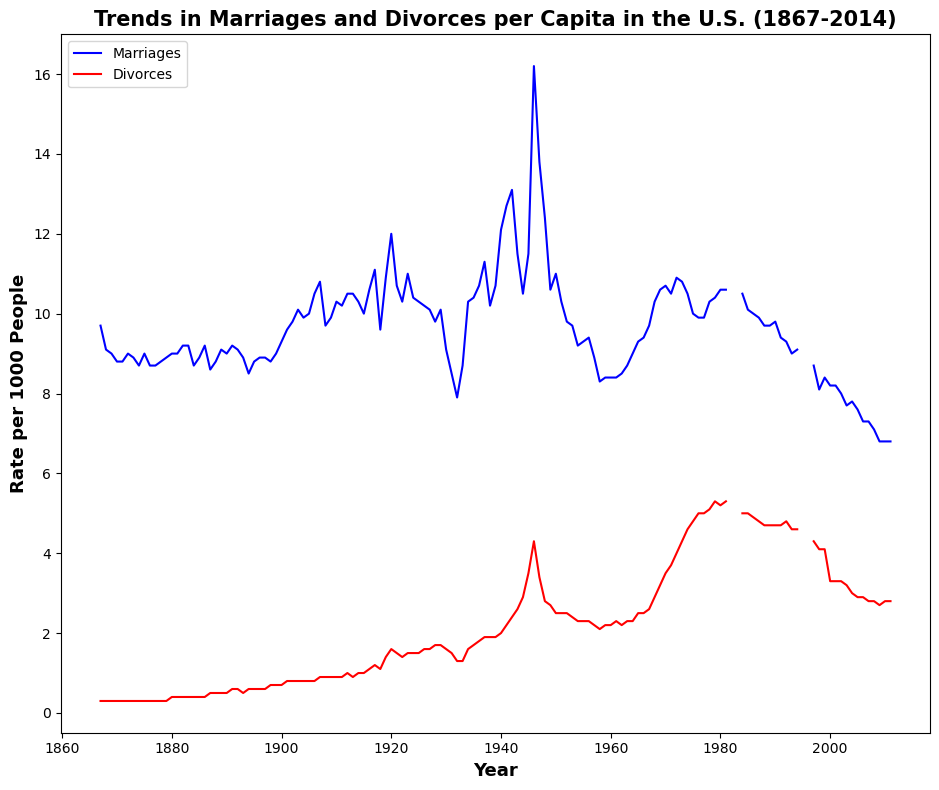

In [49]:
# Imports necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Loads the dataset containing U.S. marriage and divorce rates from 1867 to 2014
file_path = "us-marriages-divorces-1867-2014.csv"
data = pd.read_csv(file_path)

# Creates a line plot to visualize the historical trends in U.S. marriage and divorce rates
plt.figure(figsize=(9.5, 8)) 

# Plots the data for marriages and divorces per 1000 people
plt.plot(data['Year'], data['Marriages_per_1000'], label='Marriages', color='blue')
plt.plot(data['Year'], data['Divorces_per_1000'], label='Divorces', color='red')

# Sets labels and title for the plot
plt.xlabel('Year', fontweight='bold', fontsize=13)  # Label for x-axis
plt.ylabel('Rate per 1000 People', fontweight='bold', fontsize=13)  # Label for y-axis
plt.title('Trends in Marriages and Divorces per Capita in the U.S. (1867-2014)', fontweight='bold', fontsize=15)

# Adds legend to distinguish between marriages and divorces
plt.legend(loc='upper left', fontsize=10)

# Ensures a clean layout and display the plot
plt.tight_layout()  
plt.show()  

<h2>Question 7</h2>
Create a vertical bar chart comparing the number of marriages and divorces per 
capita in the U.S. between 1900, 1950, and 2000.<br>
Don't forget to label your axes!

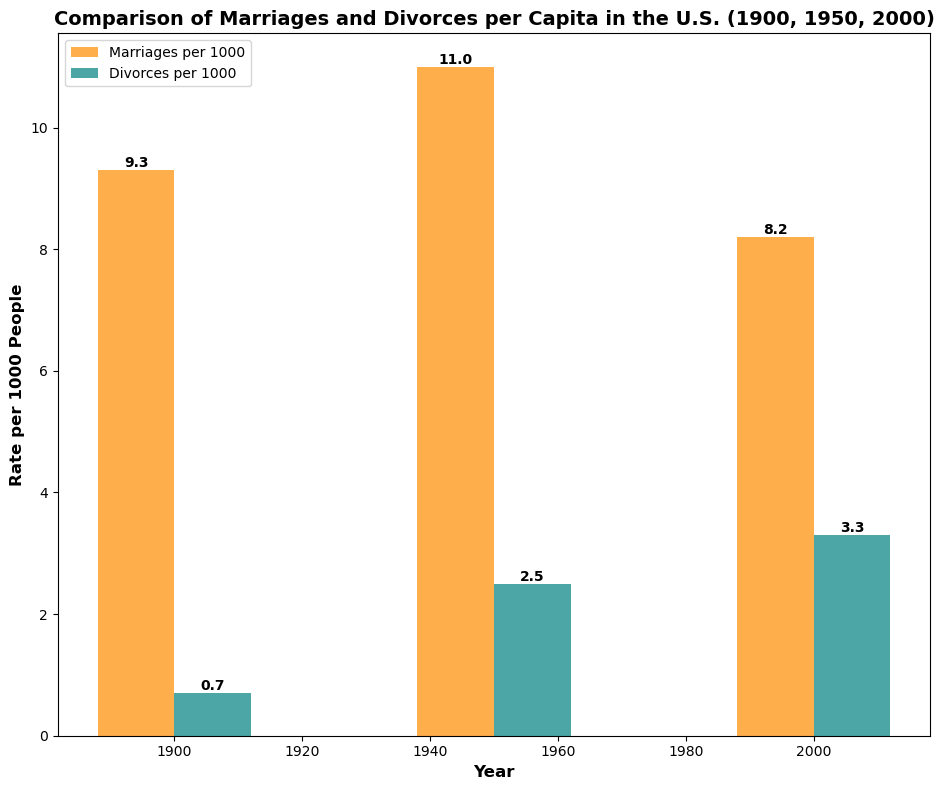

In [50]:
# Imports necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Loads the dataset containing U.S. marriage and divorce rates from 1867 to 2014
file_path = "us-marriages-divorces-1867-2014.csv"
data = pd.read_csv(file_path)

# Filters data for specific years of interest: 1900, 1950, and 2000
years_of_interest = [1900, 1950, 2000]
filtered_data = data[data['Year'].isin(years_of_interest)]

# Creates a vertical bar chart with custom styles
plt.figure(figsize=(9.5, 8)) 

# Sets the width of the bars for grouping
bar_width = 12.0

# Plots the data for marriages and divorces per 1000 people
marriages_bars = plt.bar(filtered_data['Year'] - bar_width/2, filtered_data['Marriages_per_1000'], width=bar_width, label='Marriages per 1000', alpha=0.7, color='darkorange')
divorces_bars = plt.bar(filtered_data['Year'] + bar_width/2, filtered_data['Divorces_per_1000'], width=bar_width, label='Divorces per 1000', alpha=0.7, color='teal')

# Sets labels and title with appropriate formatting
plt.xlabel('Year', fontweight='bold', fontsize=12)  # X-axis label
plt.ylabel('Rate per 1000 People', fontweight='bold', fontsize=12)  # Y-axis label
plt.title('Comparison of Marriages and Divorces per Capita in the U.S. (1900, 1950, 2000)', fontweight='bold', fontsize=14)

# Adds legend to distinguish between marriages and divorces
plt.legend(loc='upper left', fontsize=10)

# Adds numerical values on top of the bars to indicate rates
for bar in marriages_bars + divorces_bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}', ha='center', va='bottom', fontweight='bold')

# Displays the plot
plt.tight_layout()  
plt.show()  


<h2>Question 8</h2>
Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort 
the actors by their kill count and label each bar with the corresponding actor's name. <br>
Don't forget to label your axes!

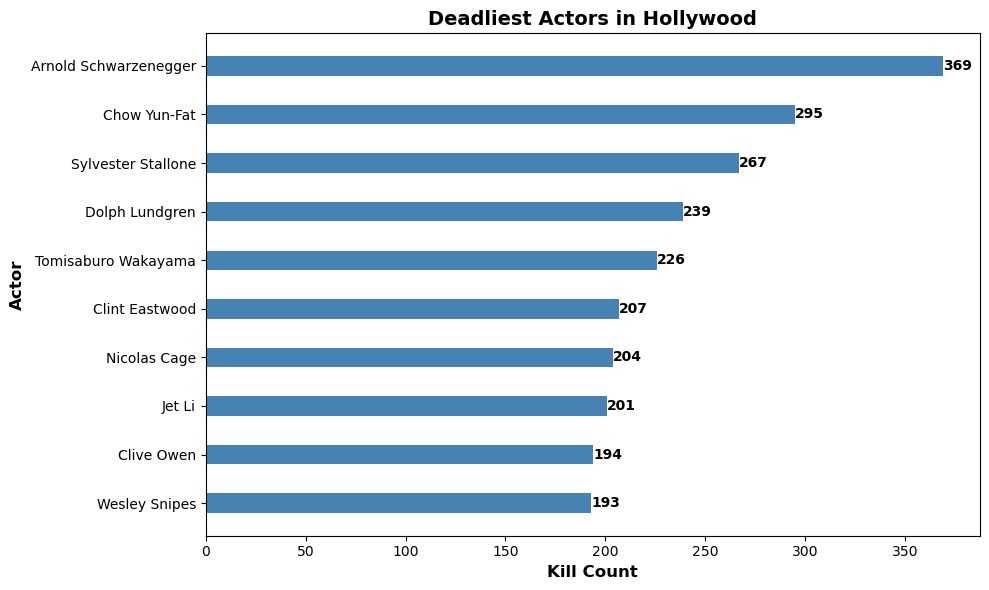

In [51]:
# Imports necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Loads the dataset containing actor kill counts
file_path = "actor_kill_counts.csv"
data = pd.read_csv(file_path)

# Sorts the data by kill count in ascending order
sorted_data = data.sort_values(by='Count', ascending=True)

# Creates a horizontal bar chart to visualize deadliest actors
plt.figure(figsize=(10, 6))  # Set the figure size

# Increases the gap between bars for better visibility
bar_gap = 0.4

# Plot the bar chart
plt.barh(sorted_data['Actor'], sorted_data['Count'], color='steelblue', height=bar_gap)

# Set labels and title for the chart
plt.xlabel('Kill Count', fontweight='bold', fontsize=12)  # X-axis label
plt.ylabel('Actor', fontweight='bold', fontsize=12)  # Y-axis label
plt.title('Deadliest Actors in Hollywood', fontweight='bold', fontsize=14) 

# Adds kill count values as labels to the bars
for index, value in enumerate(sorted_data['Count']):
    plt.text(value, index, str(value), ha='left', va='center', fontweight='bold', fontsize=10)

# Customizes the appearance of the chart
plt.grid(axis='x', linestyle='', alpha=0.7)  
plt.tight_layout() 

# Displays the plot
plt.show()


<h2>Question 9</h2>
Create a pie chart showing the fraction of all Roman Emperors that were 
assassinated.<br>
Make sure that the pie chart is an even circle, labels the categories, and shows the 
percentage breakdown of the categories.

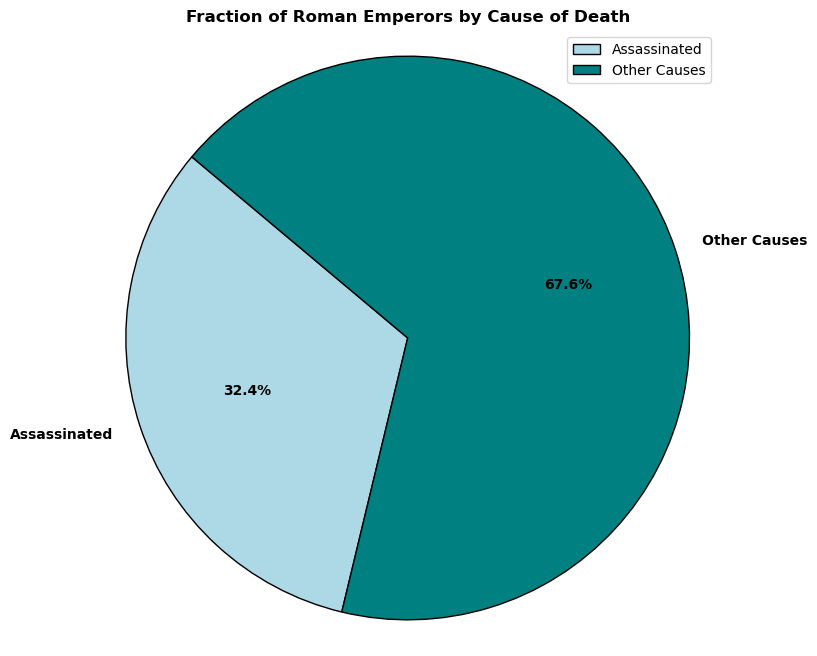

In [52]:
# Imports necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Loads the dataset containing information about Roman emperor reigns and causes of death
file_path = "roman-emperor-reigns.csv"
data = pd.read_csv(file_path)

# Calculates the number of emperors who died from assassination
assassinated_emperors = data[data['Cause_of_Death'] == 'Assassinated']
total_emperors = len(data)
assassinated_count = len(assassinated_emperors)

# Calculates the percentage of emperors who died from assassination
percentage_assassinated = (assassinated_count / total_emperors) * 100

# Creates a pie chart to visualize the causes of death
plt.figure(figsize=(8, 8))  # Set the figure size

# Colours to display in the chart
color_palette = ['lightblue', 'teal']

# Plots the pie chart with custom labels, colors, and formatting
plt.pie([assassinated_count, total_emperors - assassinated_count], 
        labels=['Assassinated', 'Other Causes'], colors=color_palette,
        autopct='%1.1f%%', startangle=140, textprops={'weight': 'bold'},
        wedgeprops={'linewidth': 1, 'edgecolor': 'black'})  

# Sets the aspect ratio to make the pie chart a circle
plt.axis('equal')

# Sets the title for the pie chart
plt.title('Fraction of Roman Emperors by Cause of Death', fontweight='bold')

# Adds a legend to the pie chart
plt.legend()

# Displays the pie chart
plt.show()


<h2>Question 10</h2>
Create a scatter plot showing the relationship between the total revenue earned by 
arcades and the number of Computer Science PhDs awarded in the U.S. between 
2000 and 2009.<br>
Don't forget to label your axes! <br>
Color each dot according to its year.

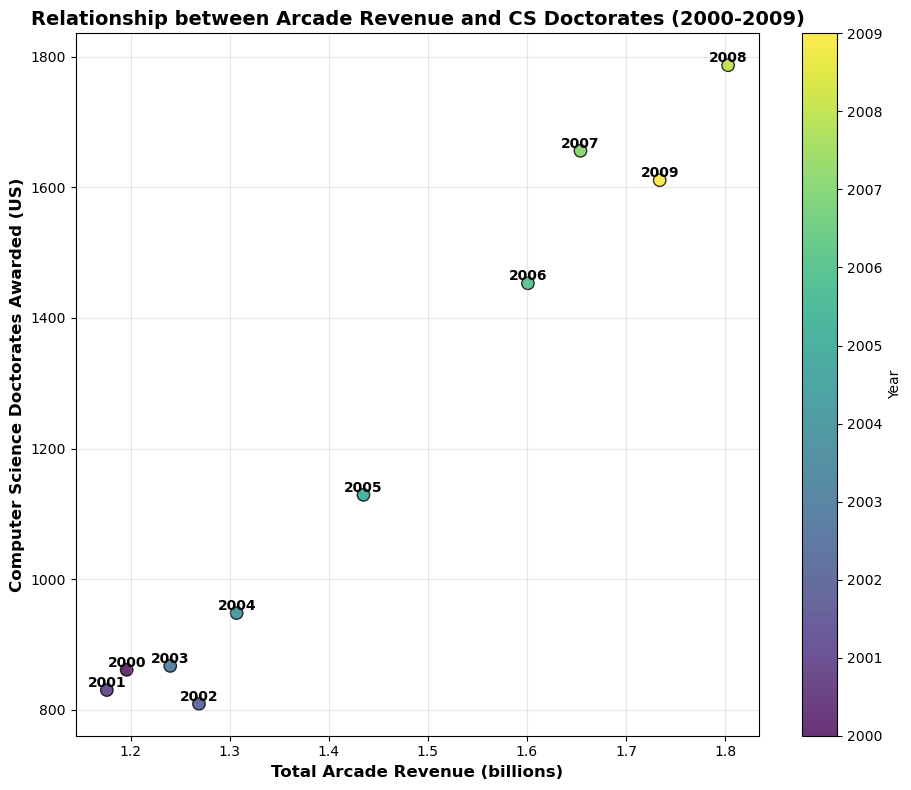

In [53]:
# Imports necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Loads the dataset containing information about arcade revenue and CS doctorates
file_path = "arcade-revenue-vs-cs-doctorates.csv"
data = pd.read_csv(file_path)

# Creates a scatter plot to visualize the relationship between arcade revenue and CS doctorates
plt.figure(figsize=(9.5, 8))  # Set the figure size

# Defines a continuous color map for smooth gradient
color_map = "viridis"

# Plots the data points with color-coded years and smooth color gradient
scatter = plt.scatter(data['Total Arcade Revenue (billions)'], data['Computer Science Doctorates Awarded (US)'],
                      c=data['Year'], cmap=color_map, s=80, edgecolors='black', alpha=0.8)  

# Sets labels and title with bold formatting
plt.xlabel('Total Arcade Revenue (billions)', fontweight='bold', fontsize=12)  # X-axis label
plt.ylabel('Computer Science Doctorates Awarded (US)', fontweight='bold', fontsize=12)  # Y-axis label
plt.title('Relationship between Arcade Revenue and CS Doctorates (2000-2009)', fontweight='bold', fontsize=14)  

# Adds year as text to each data point with proper alignment and formatting
for i, year in enumerate(data['Year']):
    plt.text(data['Total Arcade Revenue (billions)'][i], data['Computer Science Doctorates Awarded (US)'][i], str(year),
             fontsize=10, ha='center', va='bottom', fontweight='bold')

# Adds a colorbar to indicate the years
cbar = plt.colorbar(scatter)
cbar.set_label('Year')

# Customizes the appearance of the chart
plt.grid(alpha=0.3)  
plt.tight_layout()  

# Displays the scatter plot
plt.show()